In [1]:
#ds imports
import pandas as pd
import numpy as np
import os
import wrangle as wr
import explore as ex
import model as mo
import warnings
warnings.filterwarnings("ignore")
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
# splitting
from sklearn.model_selection import train_test_split
import scipy.stats as stats
# sklearn
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#CATboost imports
from catboost import CatBoostClassifier
from sklearn.svm import SVC


### PLEASE understand the README FILE before browsing this notebook for a broader understanding of the project context.

# ACQUIRE and Prep:


Inspired dataset courtesy of https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data, we created and curated a dataset by scrapping https://www.pro-football-reference.com. Features indicating meta-game conditions were included and/or engineered from existing data with dates ranging from 1979-2023.

- For information on how the data was scrapped, go to the aquire_j notebook in the ACQUIRE folder in the Github Repository. 

- For information on how the data was prepped, go to the josh_prep.ipynb notebook in the PREPARE folder in the Github Repository.

|Feature |  Data type | Definition |
|---|---|---|
| date: | object | Day-Month-Year|
| day_of_weeky: | int  | Day of the week when the game begins |
| start_times: | int  | Hour of the day when the game begins |
| week_num: | int  | Week number for the game during the season |
| home_score: | int | Final score for home team |
| home_wins: | int | Total home team wins before game start |
| stadium: | str | Statium where the game was played |
| away_score: | int  | Final score for away team |
| away_wins: | int  | Total home team wins before game start  |
| temp: | int  | Temperature during the game |
| humidity: | int  | Humidity during the game |
| wind: | int  | Wind during the game |
| spread: | float | Spead of the game (How likely a team will win) |
| ou: | float | Over/Under betting score set by Professionals/Vegas | 
| is_under: | int  | TARGET: Is the game ou score over or under the Vegas Score |
| abnormal_start: | int | Does the game start at an abnormal time|
| total_scores : | int | Total scores combined forom home and away |
| playoff_implications: | int | Does the game have playoff implications |
| is_turf: | int  | Does the field use grass or turf |
| is_outdoor: | int  | Is the Game played outdoors or inside a dome |


In [2]:
# read prepped.csv
df = pd.read_csv('prepped_data.csv')

#### Prepping consisted of:
   1. Setting date time
   2. Creating abnormal_start column
   3. Creating is_playoff column
   4. Created total_scores column
   5. Created home_wins and away_wins columns
   6. Created playoff_implications column
   7. Created is_turf column
   8. Created is_outdoor column
   9. Filled temp NaN with mean average (72)
   10. Removed all over under outcomes that pushed (Tie)
   11. Removed all other NaNs in ou.
   12. Changed dypes 
   

In [3]:
# Lets take a look at our data
df

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,stadium,temp,...,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
0,2023-02-12,Sunday,6,19,35,16,38,16,State Farm Stadium,72,...,0,1.0,51.0,0,0,73,1,1,0,0
1,2023-01-29,Sunday,3,19,31,15,7,15,Lincoln Financial Field,52,...,14,2.5,45.5,1,0,38,1,1,0,1
2,2023-01-29,Sunday,6,19,23,15,20,14,GEHA Field at Arrowhead Stadium,22,...,13,1.5,48.0,1,0,43,1,1,0,1
3,2023-01-22,Sunday,3,19,10,14,27,13,Highmark Stadium,32,...,0,5.5,49.0,1,0,37,1,1,1,1
4,2023-01-22,Sunday,6,19,19,14,12,13,Levi's Stadium,55,...,19,4.0,47.0,1,0,31,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,1979-09-02,Sunday,4,1,14,0,0,0,Arrowhead Stadium,76,...,8,1.0,37.0,1,0,14,0,0,1,1
10807,1979-09-02,Sunday,4,1,22,0,25,0,Shea Stadium,73,...,10,2.0,41.0,0,0,47,0,0,0,1
10808,1979-09-02,Sunday,4,1,17,0,24,0,Los Angeles Memorial Coliseum,70,...,10,4.0,36.5,0,0,41,0,0,0,1
10809,1979-09-02,Sunday,4,1,16,0,33,0,Seattle Kingdome,72,...,0,2.0,42.5,0,0,49,0,0,1,0


# Train, Test, Split

In [4]:
df['spread'] = abs(df['spread'])


In [5]:
train, validate, test = ex.split_data1(df)

#### We split the dataset into three train(60%), test(22%) split(18%).

# Exploring

### TEMP vs TARGET

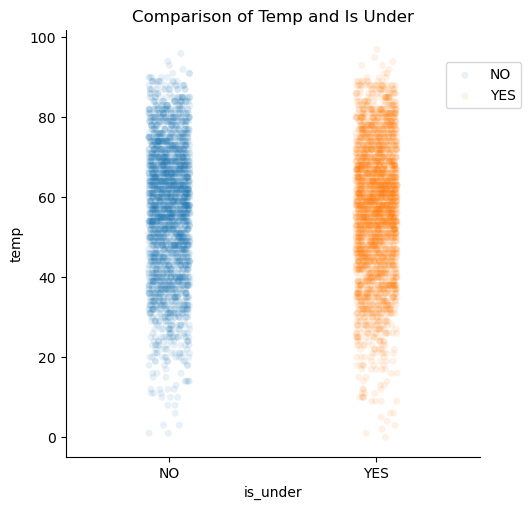

In [6]:
ex.exp_1()

#### Slightly differeing distributions...colder games may lead to more OVERS, but the difference may not be statistically significant. However, we may very well have the Power to identify a difference should one exist. No pressing need to run a T-test yet.

### WIND vs TARGET: OUTDOOR games

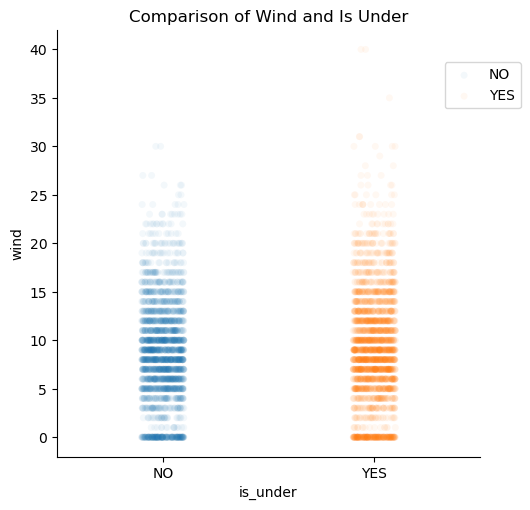

In [7]:
ex.exp_2()

#### MEAN Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games

#### Does a statistically significant difference exist between Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games?
#### T-test, 2-sample, 2-tailed


### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.

In [8]:
ex.stat_1()

3.9540841378709994 7.764812347880434e-05 0.05
p = 0.000078


In [9]:
    α = 0.05
    wind_under_values = train[train.is_under == 1].wind
    wind_over_values = train[train.is_under == 0].wind
    t, p = stats.ttest_ind(wind_under_values,wind_over_values,equal_var=True)
    print(t,p,α)
    print(f'p = {p:f}')

3.9540841378709994 7.764812347880434e-05 0.05
p = 0.000078


#### With a p-value well below ${a}$ = 0.05, we reject the null hypothesis. There is evidence to suggest that the two samples were drawn from different populations. i.e. Wind Speed may play a role in determining the outcome of the wager.

## Quick look at heat map? You know you want to...

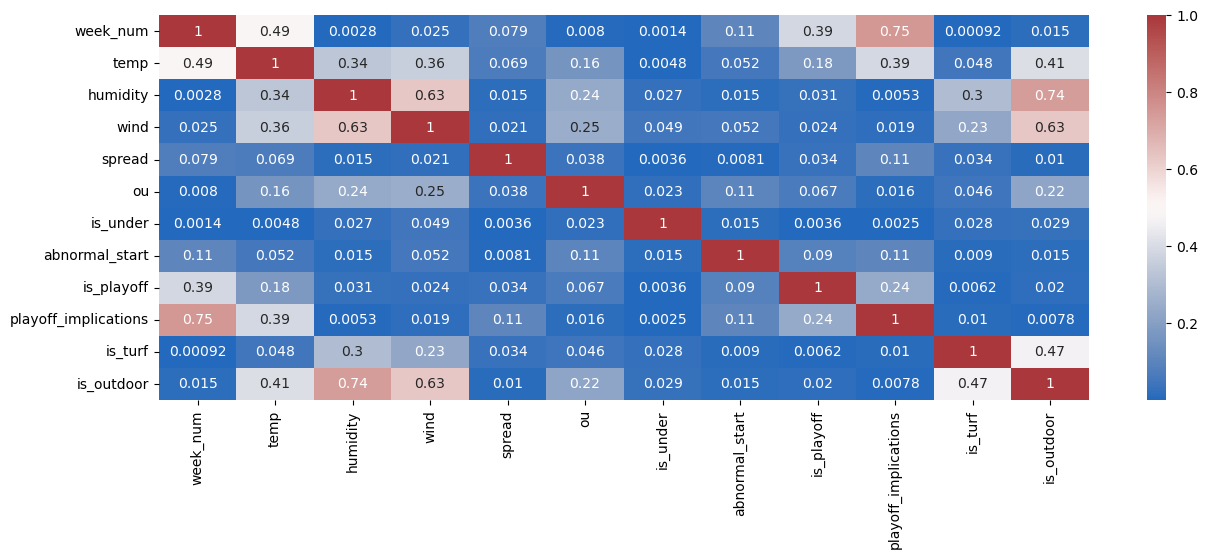

In [10]:
ex.heatmap()

#### No feature appears to correlate strongly with TARGET (is_under)

## ABNORMAL_start vs TARGET: ALL games

<Figure size 800x600 with 0 Axes>

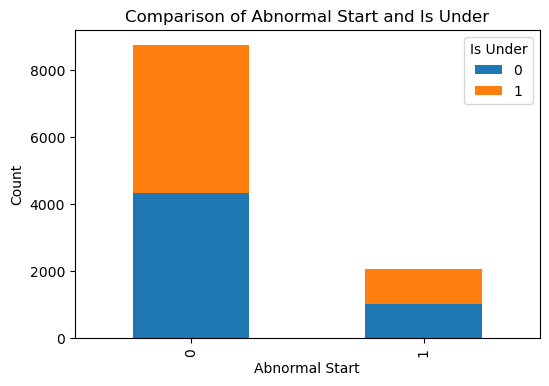

In [11]:
ex.exp_3()

### Hypotheses:
- ${H_0}$: No statistically significant difference exists between ABNORMAL_start and Is_Under.
- ${H_a}$: A statistically significant difference exists between ABNORMAL_start and Is_Under.

#### Abnormal Start Is Under of all games

In [12]:
ex.stat_2()

1.233605342746249 0.2173948197420562 0.05
p = 0.217395


#### With a p-value well above  𝑎 = 0.05, we cannot reject the null hypothesis. There is no evidence to suggest that the two samples were drawn from different populations. 

## is_TURF vs TARGET: ALL games

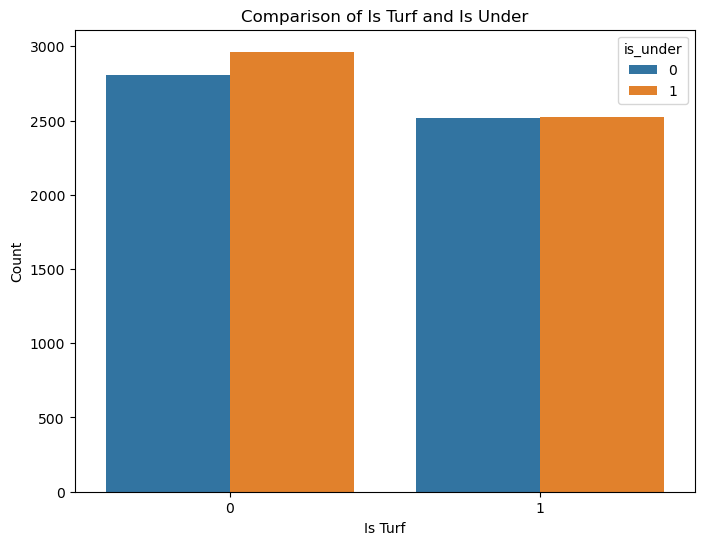

In [13]:
ex.exp_4()

### Hypotheses:
- ${H_0}$: No statistically significant difference exists between Is_Turf and Is_Under.
- ${H_a}$: A statistically significant difference exists between Is_Turf and Is_Under.

#### Is Turf vs is Under of all games

In [14]:
ex.stat_3()

-2.2152768168100945 0.02677576826385493 0.05
p = 0.026776


# Modeling

### We used 10 models to try and get the best results. these classification models consisted of:
- Decision Tree 
- random forest
- Knn
- logistic regression
- naive bayes
- catboost
- xgboost
- gradientboost
- svc
- neural net.

#### Establishing the Baseline:

In [15]:
mo.baseline()

baseline precision: 50.74%


#### Our Baseline sits at 51%. In the sports betting scene. any models we create that beat the baseline will give us a massive advantage than just "guessing on if the teams will be over/under.

## Logistic Regression

In [16]:
mo.log_reg()

Accuracy-Train 0.5186
Accuracy-Validate 0.5255
              precision    recall  f1-score   support

           0       0.51      0.44      0.48      3188
           1       0.52      0.59      0.56      3283

    accuracy                           0.52      6471
   macro avg       0.52      0.52      0.52      6471
weighted avg       0.52      0.52      0.52      6471

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      1179
           1       0.53      0.60      0.56      1215

    accuracy                           0.53      2394
   macro avg       0.52      0.52      0.52      2394
weighted avg       0.52      0.53      0.52      2394



In [17]:
mo.log_reg_test()

Accuracy-TEST 0.5211
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       959
           1       0.53      0.58      0.55       987

    accuracy                           0.52      1946
   macro avg       0.52      0.52      0.52      1946
weighted avg       0.52      0.52      0.52      1946



#### Our best performing model is the Logistic Regression model. We have a Train accuracy at 51.9% and the validate at 52.6%. The test model performed with a 52.1% accuracy. 

## SVC

In [18]:
mo.SVC_model()

Accuracy-Train 0.5838
Accuracy-Validate 0.51
              precision    recall  f1-score   support

           0       0.58      0.59      0.58      3188
           1       0.59      0.58      0.59      3283

    accuracy                           0.58      6471
   macro avg       0.58      0.58      0.58      6471
weighted avg       0.58      0.58      0.58      6471

              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1179
           1       0.52      0.49      0.50      1215

    accuracy                           0.51      2394
   macro avg       0.51      0.51      0.51      2394
weighted avg       0.51      0.51      0.51      2394



#### Our SVC model preformed awesome on the train, but fell short on the validation. 

# Conclusions

#### Findings, Takeaways and Recommendations:

- Modeling was optimized for PRECISION for the Positive Class ("is_under"). The nature of sports wagering allows False Negatives to be inconsequential, however, False Positives are punished significantly via loss of wagering capital.

- Baseline PRECISION for the most-common, Positive class is 50.7%. We calculate this rate by predicting all instances to be an instance of "is_under", and then calculate the percentage of correct predictions.

- A realistic expectation for Precision on the Validation subset ranges between 49% and 53%. Tree-Based models performed admirably well, as did the Gaussian and Bernoulli Naive-Bayes variants. A Multiple LogisticRegression classifier peformed the best and was chosen as the model for Testing purposes. Multiple Logistic Regression models also provided coefficient information for determining feature importance.

- This implies that not only is it possible to achieve a marginal "predictive capability", but we may also retain a realistic level of "interpretability" or explainability with our results if we were to use Tree-Based classifiers.

- Along with DecisionTree and Random Forest models, LogRegression pointed towards the features "wind" (wind speed) and "ou" (over/under betting line) as the Top 2 features.

- While our model is currently able to outperform baseline PRECISION for the positive class by over 2%, these results do not yet allow for an informed sports wager to be made with POSITIVE EXPECTED VALUE. A PRECISION value of greater than 55% is needed for this to be the case.

- In the future, it is recommended to further explore applications of ML clustering on this dataset to support an increase in the predictive power of classification models. Additionally, introducing new features into the dataset may improve model performance. Finally, performance gains may be achieved by utilizing a subset of dataset features.

#### Applications:

- For the purposes of placing "Over/Under" wagers for NFL games, the first step is to decide upon a wagering strategy. Do we look to maximaize the ACCURACY of bets regardless of whether we bet "Over" or "Under", or is it wiser to identify (PRECISION) those games which are predicted to be "Under", and thus limit ourselves to betting the "Under" on these games?

- For oddsmakers who are responsible for setting the Over/Under betting lines which will garner the most interest (and thus profits) from the sports-wagering public, this model would compliment existing software tools by providing insights into the corrsponding probabilities of "Over" and "Under" for each possible value of the "Over/Under" line. That number which is closest to a 50/50 split would indicate the number which will generate the greatest Return on Investment (ROI).

- Further evaluation is necessary to compare the probability that the total score in an NFL game is over or under a particular betting line to the payoff odds offered by the sportsbook. Much information is publicly available to make this evaluation so that a wager can be made with a Positive Expected Value. It is outside the scope of this project to elaborate further on the topic of sports wagering theory and practice. As a starting point, please visit the "Wizard of Odds", Michael Shackleford's website at https://wizardofodds.com/games/sports-betting.